In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [31]:
def manhattan(x,y):
    return np.sum(np.abs(x-y),axis=1)

In [32]:
def clustering(X,centers,metric):
    if metric == "manhattan":
        return np.array([np.argmin(manhattan(x,centers)) for x in X])
    else:
        return np.array([np.argmin(norm(x-centers, axis=1)) for x in X])

In [33]:
def compute_centers(X,clusters):
    ans = []
    for i in np.unique(clusters):
        cluster = X[clusters == i] 
        if cluster is not None:
            ans.append(np.mean(cluster,axis = 0))
    return np.array(ans)

In [34]:
def KMeans(X,centers,metric="euclid"):
    num_of_iters = 0
    while True:
        num_of_iters +=1
        clusters = clustering(X,centers,metric)
        centers = compute_centers(X,clusters)
        if all(clusters == clustering(X,centers,metric)):
            if metric == "manhattan":
                diams = np.array([round(np.max(manhattan(centers[i],X[clusters == i])),3) for i in range(len(centers))])
            else:
                diams = np.array([round(np.max(norm(X[clusters == i]-centers[i],axis=1)),3)for i in range(len(centers))])
            return clusters, centers, num_of_iters,diams

In [40]:
X = np.random.uniform(low=-40,high=40,size=(500,2))
k = 3

centers = [X[np.random.choice(len(X),k)],
           np.array([(max(X[:, 0]), max(X[:, 1])), (min(X[:, 0]), min(X[:, 1])), (max(X[:, 0]), min(X[:, 1])),
                                (min(X[:, 0]), max(X[:, 1]))])]
metrics = ['euclid','manhattan']

centers_name = ['random','max/min']

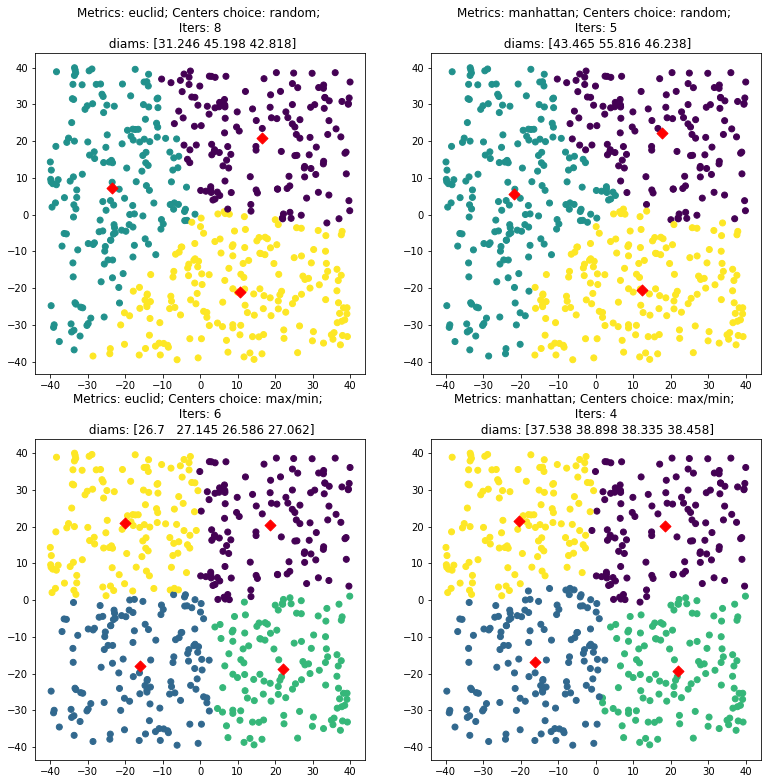

In [41]:
fig, axes = plt.subplots(2,2,figsize=(13,13))

for i in range(2):
    for j in range(2):
        cls,cent,k,diams = KMeans(X,centers[i],metrics[j])
        axes[i,j].scatter(X[:,0],X[:,1],c=cls)
        axes[i,j].scatter(cent[:,0],cent[:,1],c="red",s=60, marker="D")
        axes[i,j].set_title("Metrics: {}; Centers choice: {}; \n Iters: {} \n diams: {}".format(metrics[j],centers_name[i],k,diams))
fig.savefig("")